## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519

/content/drive/MyDrive/CSE519


# Download data from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

# Alternate: download data using gdown (if having issues with Kaggle)

In [ ]:
!pip install gdown

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
gdown.download(url)

Downloading...
From: https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM
To: /content/drive/My Drive/CSE519/commonlit-evaluate-student-summaries.zip
100%|██████████| 1.10M/1.10M [00:00<00:00, 67.7MB/s]


'commonlit-evaluate-student-summaries.zip'

# Extract data and install packages (regardless of data acquisition method)

In [ ]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install textstat
!pip install nltk
!pip install https://github.com/andreasvc/readability/tarball/master
### END

  Using cached https://github.com/andreasvc/readability/tarball/master
  Preparing metadata (setup.py) ... done


## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [ ]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import textstat
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# import readability

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
import readability
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.tokenize.sonority_sequencing import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
###

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [ ]:
trainData = pd.read_csv('prompts_train.csv')
summariesTrainData = pd.read_csv('summaries_train.csv')
df3 = summariesTrainData.merge(trainData, on=["prompt_id"], how='outer')
df3 = df3.rename(columns={'text': 'summaries_text'})

## **Section 2: Features (Q2 and Q3, 25 points total)**

2.1 Number of words in student response (text) and prompt (prompt_text)

In [ ]:
df3['summaries_text_word_count'] = df3['summaries_text'].str.split().str.len()
df3['prompt_text_word_count'] = df3['prompt_text'].str.split().str.len()

print('Correlation with content: ')
corr = df3['summaries_text_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['summaries_text_word_count'].corr(df3['wording'], method='spearman')
print(corr)

print('Correlation with content: ')
corr = df3['prompt_text_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['prompt_text_word_count'].corr(df3['wording'], method='spearman')
print(corr)

Correlation with content: 
0.8497362230393625
Correlation with wording: 
0.5977722317163577
Correlation with content: 
-0.049061122647702904
Correlation with wording: 
-0.14327440195179766


# 2.2 Number of distinct words in student response (text) and prompt (prompt_text)

In [ ]:
# Function to count distinct words in a text
def count_distinct_words(text):
    words = text.replace(',', '').replace('.', '').lower().split()
    return len(set(words))

df3['summaries_text_distinct_word_count'] = df3['summaries_text'].apply(count_distinct_words)
df3['prompt_text_distinct_word_count'] = df3['prompt_text'].apply(count_distinct_words)

print('Correlation with content: ')
corr = df3['summaries_text_distinct_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['summaries_text_distinct_word_count'].corr(df3['wording'], method='spearman')
print(corr)

print('Correlation with content: ')
corr = df3['prompt_text_distinct_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['prompt_text_distinct_word_count'].corr(df3['wording'], method='spearman')
print(corr)


Correlation with content: 
0.8303035817486873
Correlation with wording: 
0.5712559821371087
Correlation with content: 
0.005401642069473183
Correlation with wording: 
-0.0852321375592228


# 2.3 Number of words common to student response (text) and prompt (prompt_text)

In [ ]:
# Function to count common words to summaries_text and prompt_text
def count_common_words(row, key1, key2):
    summaries_words = set(row[key1].replace(',', '').replace('.', '').lower().split())
    prompt_words = set(row[key2].replace(',', '').replace('.', '').lower().split())
    common_words = summaries_words.intersection(prompt_words)
    return len(common_words)

df3['summaries_prompt_text_common_word_count'] = df3.apply(count_common_words, axis=1, key1='summaries_text', key2='prompt_text')
print('Correlation with content: ')
corr = df3['summaries_prompt_text_common_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['summaries_prompt_text_common_word_count'].corr(df3['wording'], method='spearman')
print(corr)

Correlation with content: 
0.7321444454647049
Correlation with wording: 
0.3781100272711783


# 2.4 Number of words common to student response (text) and prompt_question

In [ ]:
df3['summaries_prompt_question_common_word_count'] = df3.apply(count_common_words, axis=1, key1='summaries_text', key2='prompt_question')
# print(df3['summaries_prompt_question_common_word_count'])
print('Correlation with content: ')
corr = df3['summaries_prompt_question_common_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['summaries_prompt_question_common_word_count'].corr(df3['wording'], method='spearman')
print(corr)

Correlation with content: 
0.4660713094325896
Correlation with wording: 
0.38858640332199385


# 2.5 Number of words common to student response (text) and prompt_title


In [ ]:
df3['summaries_prompt_title_common_word_count'] = df3.apply(count_common_words, axis=1, key1='summaries_text', key2='prompt_title')
print('Correlation with content: ')
corr = df3['summaries_prompt_title_common_word_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['summaries_prompt_title_common_word_count'].corr(df3['wording'], method='spearman')
print(corr)

Correlation with content: 
0.3080275578581198
Correlation with wording: 
0.29632153400660916


In [ ]:
df3.head()


,student_id,prompt_id,summaries_text,content,wording,prompt_question,prompt_title,prompt_text,summaries_text_word_count,prompt_text_word_count,summaries_text_distinct_word_count,prompt_text_distinct_word_count,summaries_prompt_text_common_word_count,summaries_prompt_question_common_word_count,summaries_prompt_title_common_word_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,49,272,24,7,3
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,131,272,52,10,3
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,47,272,29,7,3
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,55,272,39,9,3
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,24,272,16,8,3


In [ ]:
#BEGIN[Google - Medium][https://medium.com/mlearning-ai/4-popular-techniques-to-measure-the-readability-of-a-text-document-32a0882db6b2]"Readability index methods"
#END[Google - Medium]
#BEGIN[Google][https://pypi.org/project/readability/]"readability python library"
#END[Google]

def count_adjectives(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    adjective_count = sum(1 for word, pos in pos_tags if pos.startswith('JJ'))
    return adjective_count

def count_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stopwords_count = sum(1 for word in tokens if word.lower() in stop_words)
    return stopwords_count

def count_nouns(sentence):
    words = word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)
    noun_count = sum(1 for word, pos in pos_tags if pos in ['NN', 'NNS'])
    return noun_count

def calculate_readability(sent):
  return readability.getmeasures(sent, lang='en')

df3['readability'] = df3['summaries_text'].apply(calculate_readability)
def extract_readability_grades(readability_measures):
    readability_grades = readability_measures['readability grades']
    return readability_grades

def getGunningFogIndex(readability_grades):
  return readability_grades['GunningFogIndex']

def extract_sentence_grades(sentence_measures):
  sentence_grades = sentence_measures['sentence info']
  return sentence_grades

def getComplexWordsDC(sentence_measures):
  return sentence_measures['complex_words_dc']

def getWordsPerSentence(sentence_measures):
  return sentence_measures['words_per_sentence']


In [ ]:
df3['readability_grades'] = df3['readability'].apply(extract_readability_grades)
df3['GunningFogIndex'] = df3['readability_grades'].apply(getGunningFogIndex)
print('Correlation with content: ')
corr = df3['GunningFogIndex'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['GunningFogIndex'].corr(df3['wording'], method='spearman')
print(corr)


Correlation with content: 
0.8485871550176712
Correlation with wording: 
0.5975172618302055


In [ ]:
df3['sentence_measures'] = df3['readability'].apply(extract_sentence_grades)
df3['complex_words_dc'] = df3['sentence_measures'].apply(getComplexWordsDC)
print('Correlation with content: ')
corr = df3['complex_words_dc'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['complex_words_dc'].corr(df3['wording'], method='spearman')
print(corr)


Correlation with content: 
0.7994065865723264
Correlation with wording: 
0.5530642791873426


In [ ]:
df3['sentence_measures'] = df3['readability'].apply(extract_sentence_grades)
df3['words_per_sentence'] = df3['sentence_measures'].apply(getWordsPerSentence)
print('Correlation with content: ')
corr = df3['words_per_sentence'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['words_per_sentence'].corr(df3['wording'], method='spearman')
print(corr)


Correlation with content: 
0.8500618126224087
Correlation with wording: 
0.5997927685520806


> This feature(words_per_sentence) correlates really well with content so it can help predict the content scores more precisely.
> This feature correlates with wording with a Spearman index of 0.599 which implies it will be a good estimator of the wording score

In [ ]:
df3['adj_count_summaries'] = df3['summaries_text'].apply(count_adjectives)
print('Correlation with content: ')
corr = df3['adj_count_summaries'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['adj_count_summaries'].corr(df3['wording'], method='spearman')
print(corr, '\n')


Correlation with content: 
0.6585197657218765
Correlation with wording: 
0.4441466381422682 



In [ ]:
df3['noun_count'] = df3['summaries_text'].apply(count_nouns)
print('Correlation with content: ')
corr = df3['noun_count'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['noun_count'].corr(df3['wording'], method='spearman')
print(corr, '\n')

Correlation with content: 
0.7888640652762099
Correlation with wording: 
0.5257476533284923 



In [ ]:
df3['stopwords_count_summaries'] = df3['summaries_text'].apply(count_stopwords)
print('Correlation with content: ')
corr = df3['stopwords_count_summaries'].corr(df3['content'], method='spearman')
print(corr)
print('Correlation with wording: ')
corr = df3['stopwords_count_summaries'].corr(df3['wording'], method='spearman')
print(corr)

Correlation with content: 
0.81761806230633
Correlation with wording: 
0.5840446207031562


## **Section 3: Content and Wording (Q4, 10 points)**

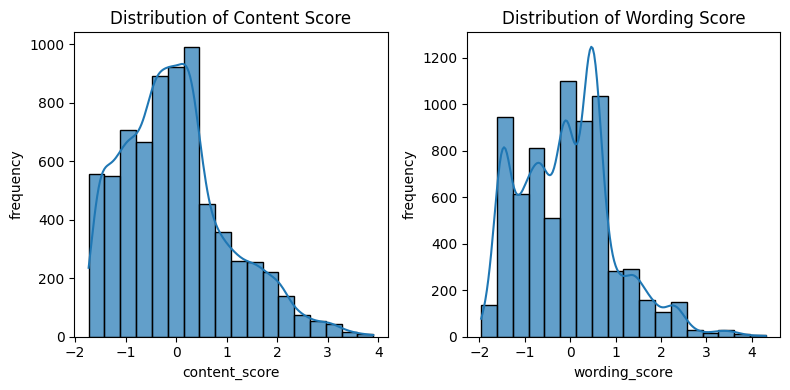

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(df3['content'], bins=18, ax=ax, alpha=0.7, kde=True)
ax.set_xlabel('content_score')
ax.set_ylabel('frequency')
ax.set_title(f'Distribution of Content Score')

ax = axes[1]
sns.histplot(df3['wording'], bins=18, ax=ax, alpha=0.7, kde=True)
ax.set_xlabel('wording_score')
ax.set_ylabel('frequency')
ax.set_title(f'Distribution of Wording Score')

plt.tight_layout()
plt.show()


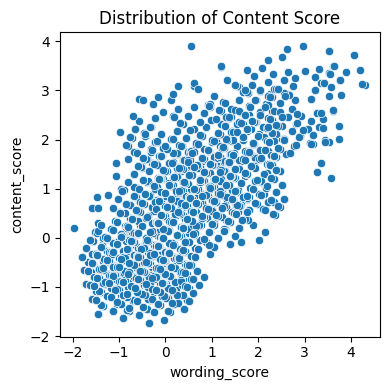

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df3, x='wording', y='content', marker='o')
plt.xlabel('wording_score')
plt.ylabel('content_score')
plt.title(f'Distribution of Content Score')

plt.tight_layout()
plt.show()

In [ ]:
# Compute Pearson's correlation coefficient
pearson_corr = df3['content'].corr(df3['wording'], method='pearson')

# Compute Spearman's rank correlation coefficient
spearman_corr = df3['content'].corr(df3['wording'], method='spearman')

print(f"Pearson's Correlation Coefficient: {pearson_corr:.2f}")
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr:.2f}")

print('Range of content values')
print('min: ', df3['content'].min(), 'max: ', df3['content'].max())

print('Range of wording values')
print('min: ', df3['wording'].min(), 'max: ', df3['wording'].max())

Pearson's Correlation Coefficient: 0.75
Spearman's Rank Correlation Coefficient: 0.71
Range of content values
min:  -1.729859453 max:  3.900326104
Range of wording values
min:  -1.962613794 max:  4.310693151


What is the range of values here?
> We can see that the range of values for content vary from -1.73 to 3.90
> We can see that that the range of values for wording score vary from -1.96 to 4.31

How well correlated are they?
> The Pearson and Spearman correlation coefficients are 0.75 and 0.71 respectively which indicates they have high positive correlation

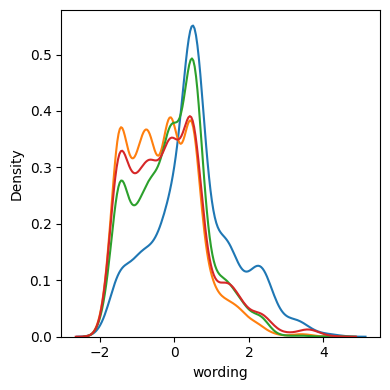

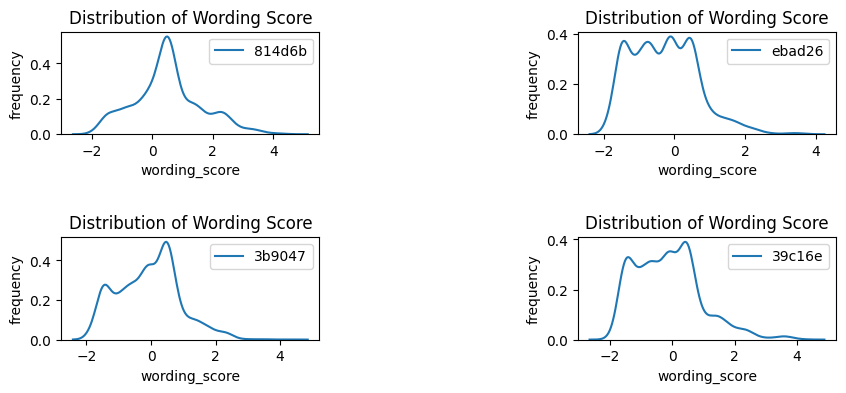

In [ ]:
unique_prompts = df3['prompt_id'].unique()

plt.figure(figsize=(4, 4))
for prompt_id in unique_prompts:
    prompt_data = df3[df3['prompt_id'] == prompt_id]
    sns.kdeplot(prompt_data['wording'])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
axes = axes.flatten()
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)
i = 0
for prompt_id in unique_prompts:
    ax = axes[i]
    i = i + 1
    prompt_data = df3[df3['prompt_id'] == prompt_id]
    sns.kdeplot(prompt_data['wording'], ax=ax, label=prompt_id)
    ax.set_xlabel('wording_score')
    ax.set_ylabel('frequency')
    ax.legend()
    ax.set_title(f'Distribution of Wording Score')


 Do the shapes of these distributions differ for the different prompts?
 > For wording, the shapes of these distributions are different for different prompts although the trends for prompt_id 3b9047 and 814d6b are a little similar with same global maximum but the 3b9047 also has another peak. We can say that highest frequency is for scores between 0 to 1 where the global peak lies for every prompt.

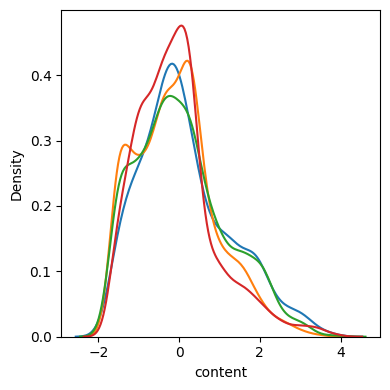

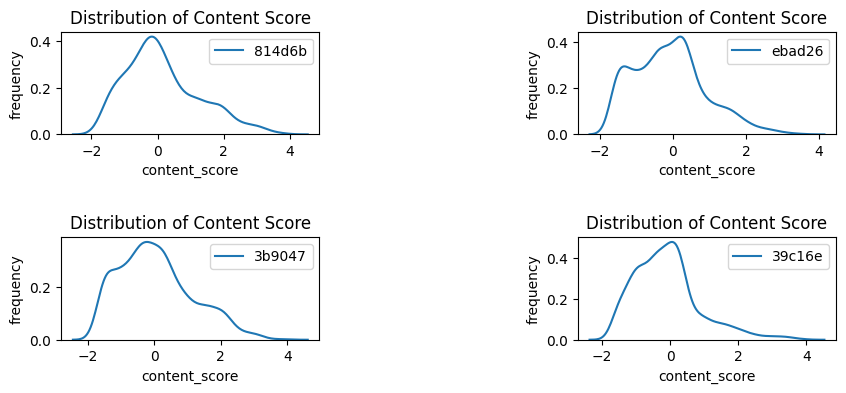

In [ ]:
plt.figure(figsize=(4, 4))
for prompt_id in unique_prompts:
    prompt_data = df3[df3['prompt_id'] == prompt_id]
    sns.kdeplot(prompt_data['content'])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
axes = axes.flatten()
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)
i = 0
for prompt_id in unique_prompts:
    ax = axes[i]
    i = i + 1
    prompt_data = df3[df3['prompt_id'] == prompt_id]
    sns.kdeplot(prompt_data['content'], ax=ax, label=prompt_id)
    ax.set_xlabel('content_score')
    ax.set_ylabel('frequency')
    ax.legend()
    ax.set_title(f'Distribution of Content Score')

Do the shapes of these distributions differ for the different prompts?
> For content, unlike wording these distributions are more or less similar as can be observed in the first graph. We can say that the prompt_id is not a factor that affected the content score much.

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [ ]:
#BEGIN[Google - TowardsDataScience][https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089]"tf idf score for overrepresentation"
#END[Google - TowardsDataScience]

# Using TFIDF score
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# calculate median scores to distinguish good against bad
# Assuming 'good' essays have content_score and wording_score > median value, and 'bad' essays have content_score or wording_score <= median value
median_wording = df3['wording'].median()
median_content = df3['content'].median()

# Assuming 'good' essays have content_score and wording_score > median value, and 'bad' essays have content_score and wording_score <= median value
good_indices = df3[(df3['content'] > median_content) & (df3['wording'] > median_wording)].index
bad_indices = df3[(df3['content'] <= median_content) | (df3['wording'] <= median_wording)].index

# combine all the good essays to one and all the bad essays to one
good_essays = df3.loc[good_indices, 'summaries_text']
bad_essays = df3.loc[bad_indices, 'summaries_text']

merged_good_summaries = ' '.join(good_essays)
merged_bad_summaries = ' '.join(bad_essays)

tfidf_matrix = tfidf_vectorizer.fit_transform([merged_good_summaries, merged_bad_summaries])

good_tfidf = tfidf_matrix[0, :]
bad_tfidf = tfidf_matrix[1, :]

mean_good_tfidf = np.mean(good_tfidf, axis=0)
mean_bad_tfidf = np.mean(bad_tfidf, axis=0)

# Calculate the difference in mean TF-IDF scores
tfidf_difference = mean_good_tfidf - mean_bad_tfidf

good_over_represented_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_difference)[0, ::-1][0, :10]]
print('list of words over represented in good essays while being under represented in bad essays: ', good_over_represented_words)

bad_over_represented_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_difference)[0, :10]]
print('list of words over represented in good essays while being under represented in bad essays: ', bad_over_represented_words)


list of words over represented in good essays while being under represented in bad essays:  [array([['students', 'jones', 'experiment', 'aristotle', 'nobles',
        'farmers', 'class', 'people', 'audience', 'states']], dtype=object)]
list of words over represented in good essays while being under represented in bad essays:  [array([['would', 'soda', 'smell', 'rub', 'complex', 'take', 'meat',
        'away', 'fear', 'plan']], dtype=object)]


What is an appropriate statistic to use here?
> IDF i.e. the term frequency with inverse document frequency is a appropriate measure to use here as it gives a each term's frequency over its frequency in documents.

> Here, the tfidf_difference will allow us to get the words from a single list, the higher the tfidf difference, more the word is overrepresented in good essays at the same time being underrepresented in bad essays as we are subtracting the mean_bad_tfidf. Similarly the lower the tfidf difference for a word, more the word is over represented in bad essays while being underrepresented in good essays as the positive factor in the equation is smaller.

## **Section 5: Three Interesting Plots (Q6, 15 points)**

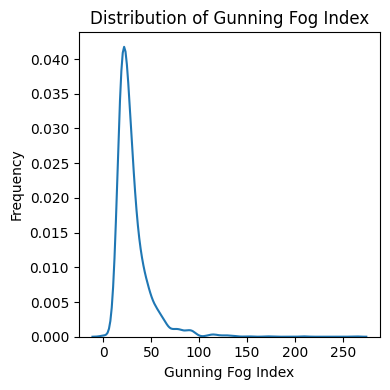

In [ ]:
plt.figure(figsize=(4, 4))
sns.kdeplot(prompt_data['GunningFogIndex'])
plt.xlabel('Gunning Fog Index')
plt.ylabel('Frequency')
plt.title(f'Distribution of Gunning Fog Index')

plt.tight_layout()
plt.show()

Here, in the plot for gunning fog index score frequencies we can see that there is only one peak for a vlaue between 0 to 50 and all the other values are present very rarely. This implies most of the essays written fall under the same bucket of readability except for the few essays that are having good readability value.

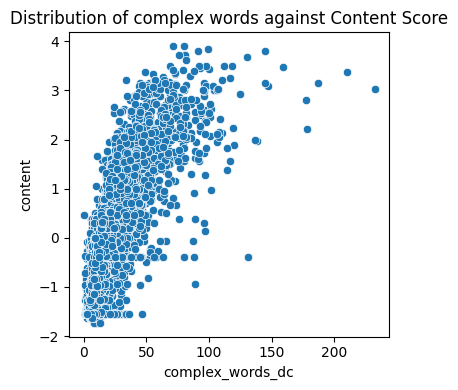

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df3, x='complex_words_dc', y='content', marker='o')
plt.xlabel('complex_words_dc')
plt.ylabel('content')
plt.title(f'Distribution of complex words against Content Score')

plt.tight_layout()
plt.show()

Here, in the plot for complex_words_dc against the content scores we can observe that the content score is increasing almost quadratically with the increase in number of complex words.

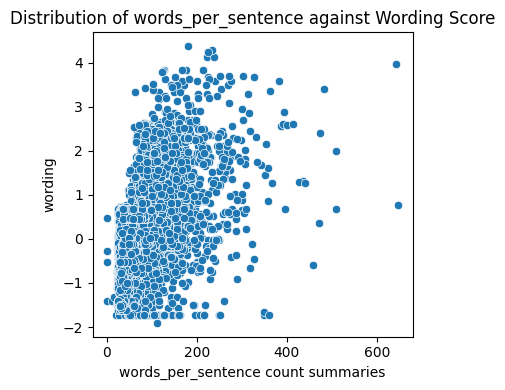

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df3, x='words_per_sentence', y='wording', marker='o')
plt.xlabel('words_per_sentence count summaries')
plt.ylabel('wording')
plt.title(f'Distribution of words_per_sentence against Wording Score')

plt.tight_layout()
plt.show()

Here, the lesser word count indicates lower wording score but we can see there are some outlier where even an higher words per sentence score like 600 has resulted in a wording score of 1 or lower.

## **Section 6: Baseline Model (Q7, 10 points)**

In [ ]:
# zscore
def getZScore(column, mean, sd):
  return column - mean / sd

columns = ['content', 'wording']
for cols in columns:
  mean = df3[cols].mean()
  sd = df3[cols].std()
  df3[cols] = df3.apply(lambda row: getZScore(row[cols], mean, sd), axis=1)

FEATURE_COLUMNS = ['summaries_text_word_count', 'prompt_text_word_count', 'summaries_text_distinct_word_count', 'prompt_text_distinct_word_count', 'summaries_prompt_text_common_word_count', 'summaries_prompt_question_common_word_count', 'summaries_prompt_title_common_word_count']
FEATURE_CONTENT = FEATURE_COLUMNS + ['content']
X_train, X_test, y_train, y_test = train_test_split(df3[FEATURE_COLUMNS], df3['wording'], test_size=0.2, random_state=42)

wording_model = LinearRegression()
wording_model.fit(X_train, y_train)
wording_predictions = wording_model.predict(X_test)
wording_mse = mean_squared_error(y_test, wording_predictions)

print("Wording Model MSE:", wording_mse)
X_train, X_test, y_train, y_test = train_test_split(df3[FEATURE_COLUMNS], df3['content'], test_size=0.2, random_state=42)
content_model = LinearRegression()
content_model.fit(X_train, y_train)
content_predictions = content_model.predict(X_test)

content_mse = mean_squared_error(y_test, content_predictions)
print("Content Model MSE:", content_mse)



Wording Model MSE: 0.5095020704584975
Content Model MSE: 0.3190589299021746


## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

Feature cleaning and preprocessing

In [ ]:
stop_words = stopwords.words('english')

punctuations = string.punctuation
def remove_punc(sent):
  words = nltk.word_tokenize(sent)
  sentence_without_punctuation = ''
  for ele in sent:
    if ele not in punctuations:
      sentence_without_punctuation += ele

  return sentence_without_punctuation

def preprocess(sent):
    sent = word_tokenize(sent)
    # removing the stop words
    sent = [word for word in sent if word not in stop_words]
    return " ".join(sent)


df3['text_preprocessed'] = df3['summaries_text'].apply(preprocess)

# Regenrate the feature after preprocessing
df3['readability'] = df3['text_preprocessed'].apply(calculate_readability)
df3['readability_grades'] = df3['readability'].apply(extract_readability_grades)
df3['GunningFogIndex'] = df3['readability_grades'].apply(getGunningFogIndex)
df3['sentence_measures'] = df3['readability'].apply(extract_sentence_grades)
df3['complex_words_dc'] = df3['sentence_measures'].apply(getComplexWordsDC)
df3['adj_count_summaries'] = df3['text_preprocessed'].apply(count_adjectives)
df3['summaries_text_distinct_word_count'] = df3['text_preprocessed'].apply(count_distinct_words)

# Normalization of the values to get a better range, this process of also a part of preprocessing,
# this is commented out as it is giving a bad mean squared on the models
# df3['summaries_text_word_count'] = Normalizer().fit_transform(np.array(df3['summaries_text_word_count']).reshape(-1,1))
# df3['summaries_text_distinct_word_count'] = Normalizer().fit_transform(np.array(df3['summaries_text_distinct_word_count']).reshape(-1,1))
# df3['GunningFogIndex'] = Normalizer().fit_transform(np.array(df3['GunningFogIndex']).reshape(-1,1))
# df3['complex_words_dc'] = Normalizer().fit_transform(np.array(df3['complex_words_dc']).reshape(-1,1))
# df3['adj_count_summaries'] = Normalizer().fit_transform(np.array(df3['adj_count_summaries']).reshape(-1,1))
# df3['stopwords_count_summaries'] = Normalizer().fit_transform(np.array(df3['stopwords_count_summaries']).reshape(-1,1))
# df3['words_per_sentence'] = Normalizer().fit_transform(np.array(df3['words_per_sentence']).reshape(-1,1))


In [ ]:
CONTENT_FEATURE_COLUMNS = ['words_per_sentence', 'summaries_text_word_count', 'GunningFogIndex', 'summaries_text_distinct_word_count', 'stopwords_count_summaries', 'complex_words_dc', 'noun_count', 'summaries_prompt_text_common_word_count']
WORDING_FEATURE_COLUMNS = ['summaries_text_word_count', 'summaries_text_distinct_word_count', 'summaries_prompt_text_common_word_count', 'GunningFogIndex', 'complex_words_dc', 'adj_count_summaries', 'stopwords_count_summaries', 'words_per_sentence']

# zscore
def getZScore(column, mean, sd):
  return column - mean / sd

columns = ['content', 'wording']
for cols in columns:
  mean = df3[cols].mean()
  sd = df3[cols].std()
  df3[cols] = df3.apply(lambda row: getZScore(row[cols], mean, sd), axis=1)

# Model 1 with
X_train, X_test, y_train, y_test = train_test_split(df3[WORDING_FEATURE_COLUMNS], df3['wording'], test_size=0.2, random_state=42)
wording_model = LinearRegression()
wording_model.fit(X_train, y_train)
wording_predictions = wording_model.predict(X_test)
wording_mse = mean_squared_error(y_test, wording_predictions)
wording_r2 = r2_score(y_test, wording_predictions)

print("Wording Model MSE:", wording_mse)
X_train, X_test, y_train, y_test = train_test_split(df3[CONTENT_FEATURE_COLUMNS], df3['content'], test_size=0.2, random_state=42)
content_model = LinearRegression()
content_model.fit(X_train, y_train)
content_predictions = content_model.predict(X_test)
content_mse = mean_squared_error(y_test, content_predictions)
content_r2 = r2_score(y_test, content_predictions)
print("Content Model MSE:", content_mse)

Wording Model MSE: 0.5743283267344446
Content Model MSE: 0.3351348661150799


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3[WORDING_FEATURE_COLUMNS], df3['wording'], test_size=0.2, random_state=42)
wording_model = RandomForestRegressor(n_estimators=100, random_state=42)
wording_model.fit(X_train, y_train)
wording_predictions = wording_model.predict(X_test)
wording_mse = mean_squared_error(y_test, wording_predictions)
print("Wording MSE:", wording_mse)

X_train, X_test, y_train, y_test = train_test_split(df3[CONTENT_FEATURE_COLUMNS], df3['content'], test_size=0.2, random_state=42)
content_model = RandomForestRegressor(n_estimators=100, random_state=42)
content_model.fit(X_train, y_train)
content_predictions = content_model.predict(X_test)
content_mse = mean_squared_error(y_test, content_predictions)
print("Content MSE:", content_mse)

Wording MSE: 0.4531806124977297
Content MSE: 0.22947178583323805


## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):